In [1]:

import pandas as pd
import numpy as np

In [2]:

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
#main class
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.dropna(inplace=True)
#drop all missing value rows 

In [5]:
df.shape

(714, 3)

In [6]:
df.sample(2)

,Survived,Age,Fare
83,0,28.0,47.1000
294,0,24.0,7.8958


In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:

X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [10]:

clf = DecisionTreeClassifier()


clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6223776223776224

In [11]:
cvs = DecisionTreeClassifier()

np.mean(cross_val_score(cvs,X,y,cv=10,scoring='accuracy'))


np.float64(0.6330985915492958)

In [12]:
# n_bins --> number of bins
#strategy --> quantile/uniform/kmean
# encode --> ordinal/one hot encoding
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile', quantile_method='averaged_inverted_cdf')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile', quantile_method='averaged_inverted_cdf')


In [13]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [14]:

X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [15]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [16]:

trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [17]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [18]:

output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [19]:

output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
228,18.0,2.0,13.0000,6.0,"(16.0, 19.0]","(10.5, 13.0]"
603,44.0,12.0,8.0500,3.0,"(42.0, 47.0]","(7.896, 8.158]"
753,23.0,5.0,7.8958,3.0,"(21.0, 23.0]","(7.775, 7.896]"
809,33.0,9.0,53.1000,12.0,"(32.0, 35.0]","(51.479, 76.292]"
309,30.0,8.0,56.9292,12.0,"(28.0, 30.0]","(51.479, 76.292]"


In [20]:

clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [21]:

accuracy_score(y_test,y_pred2)

0.6363636363636364

In [23]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

np.float64(0.6737676056338028)

In [42]:
def discretize(bins=10,strategy_age = 'uniform',strategy_fare ='kmeans' ):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy_age, quantile_method='averaged_inverted_cdf')
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy_fare, quantile_method='averaged_inverted_cdf')
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before_Age")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After_Age")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before_fare")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("After_Fare")

    plt.show()

 Age is    uniform   And    fare is   uniform
0.6302621283255085


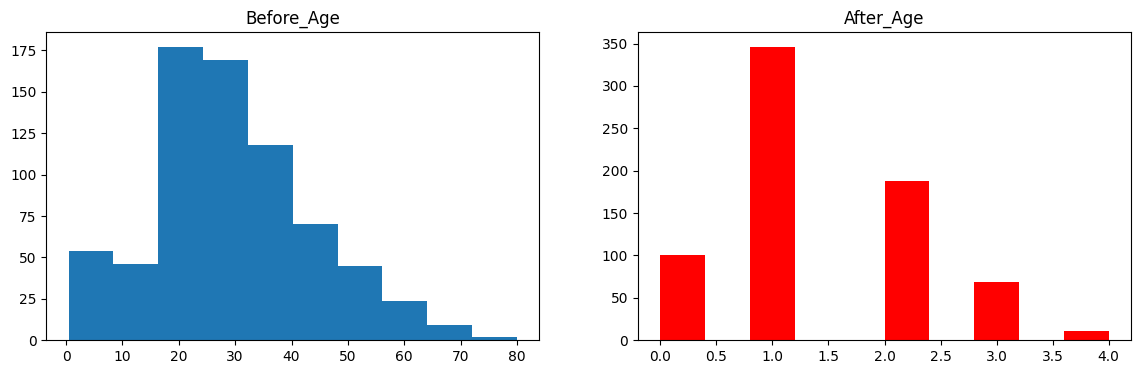

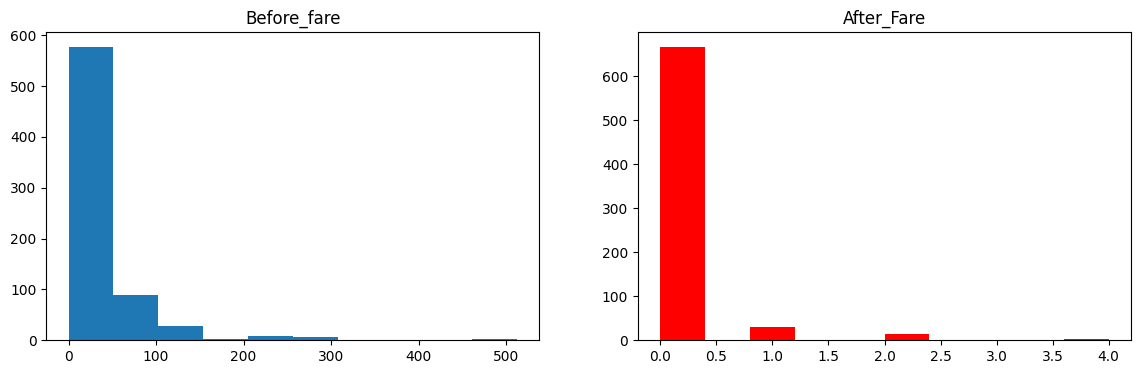

 Age is    uniform   And    fare is   quantile
0.6316901408450704


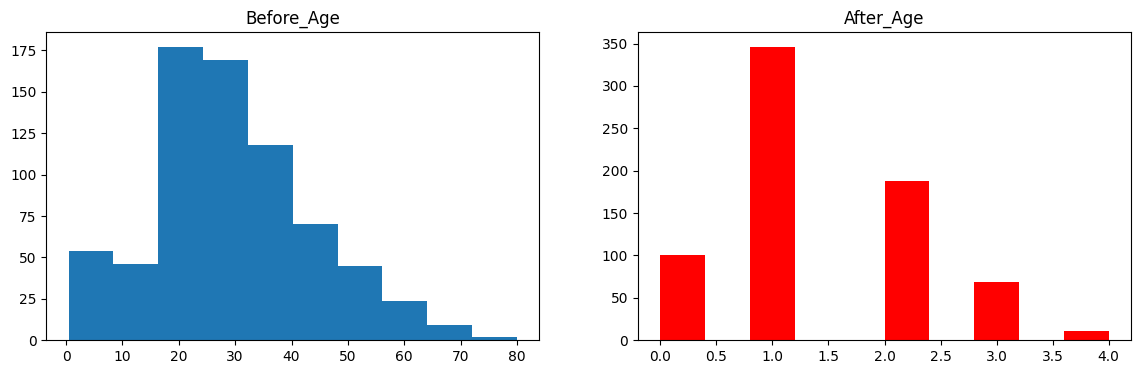

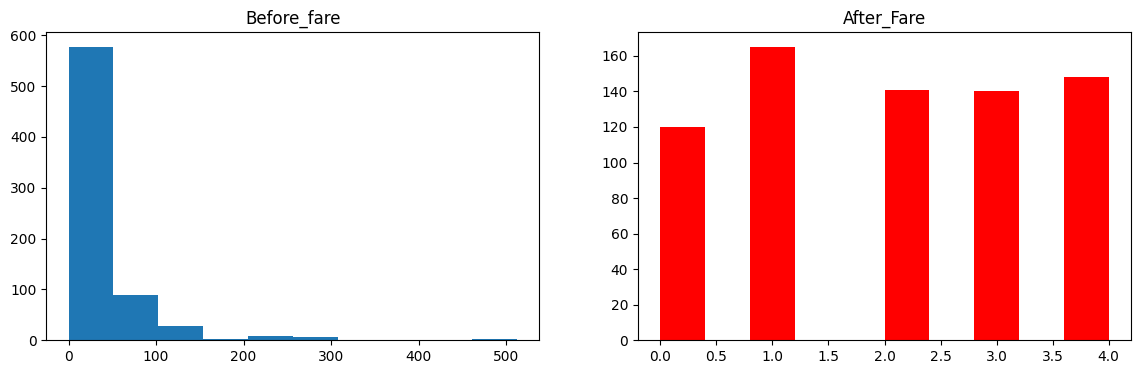

 Age is    uniform   And    fare is   kmeans
0.6317488262910798


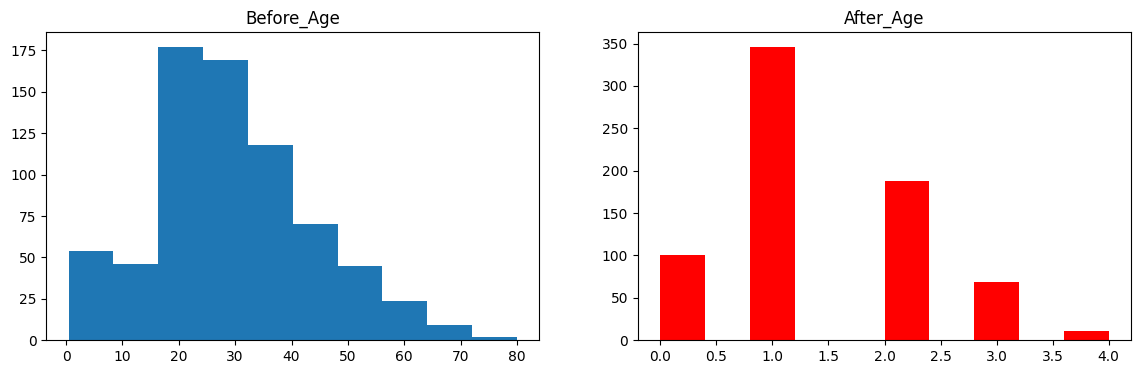

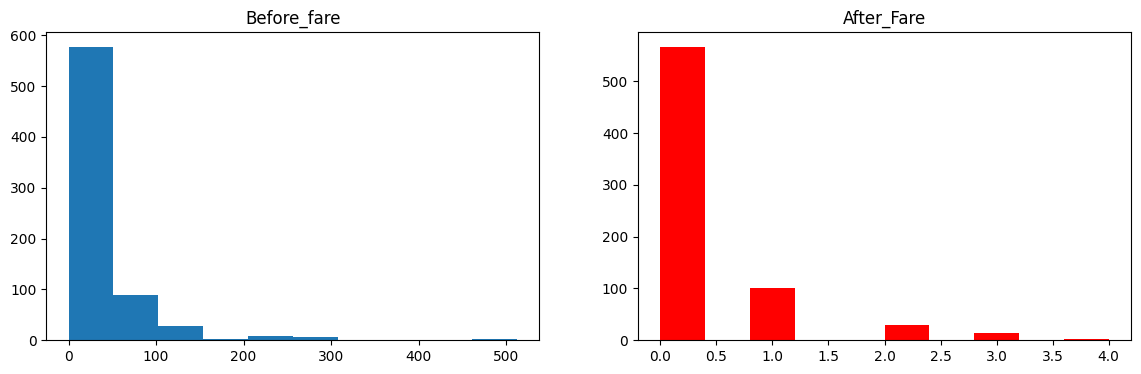

 Age is    quantile   And    fare is   uniform
0.6288928012519561


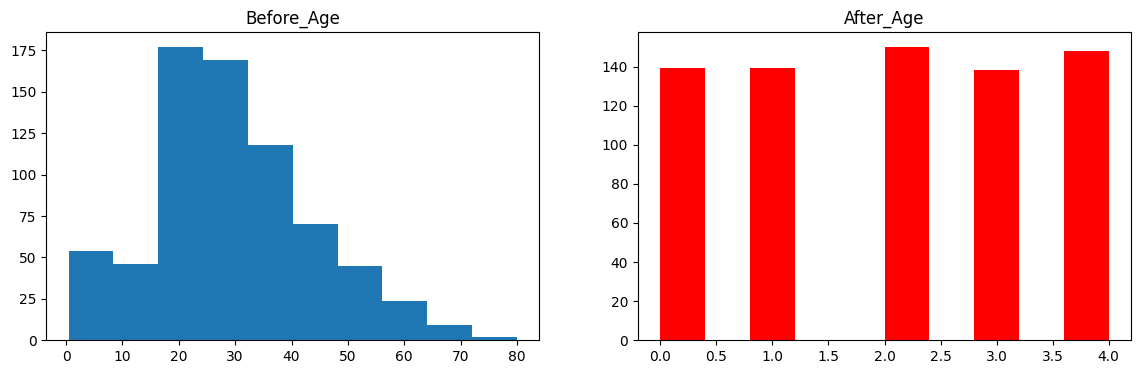

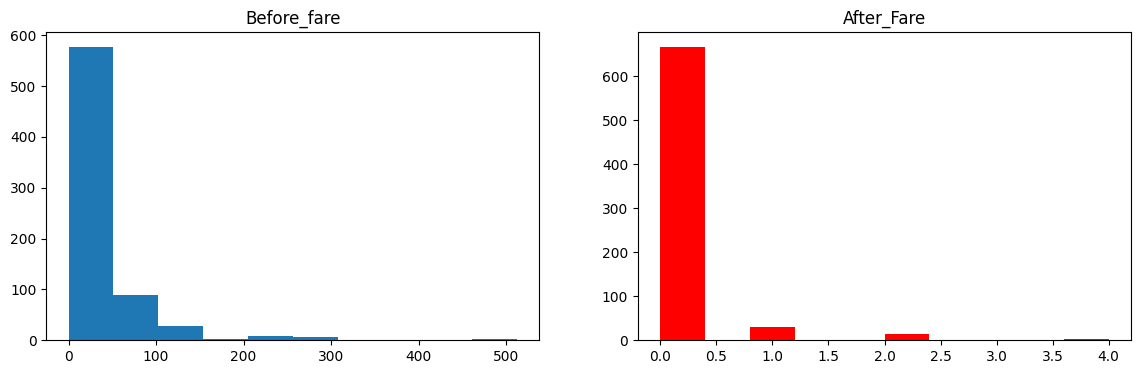

 Age is    quantile   And    fare is   quantile
0.6359350547730829


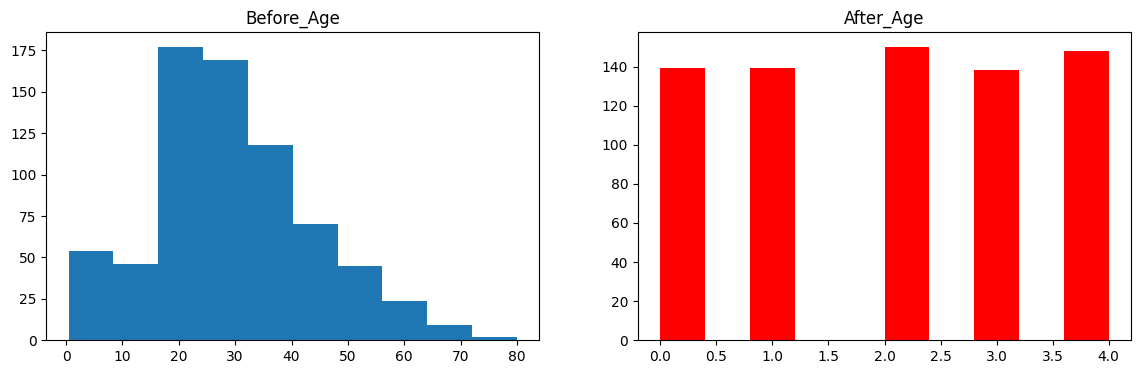

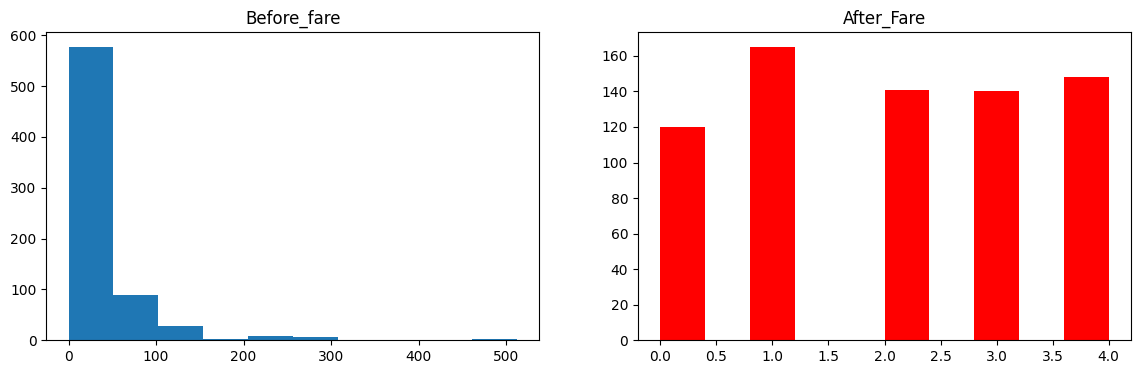

 Age is    quantile   And    fare is   kmeans
0.6289319248826291


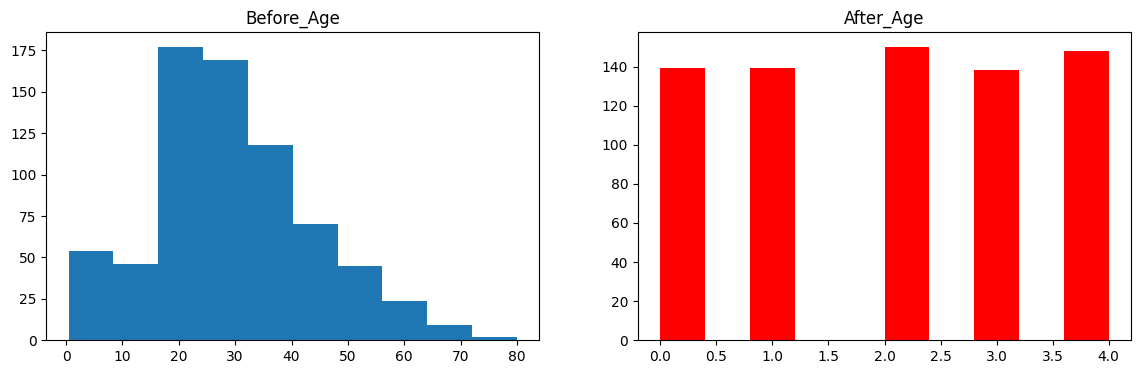

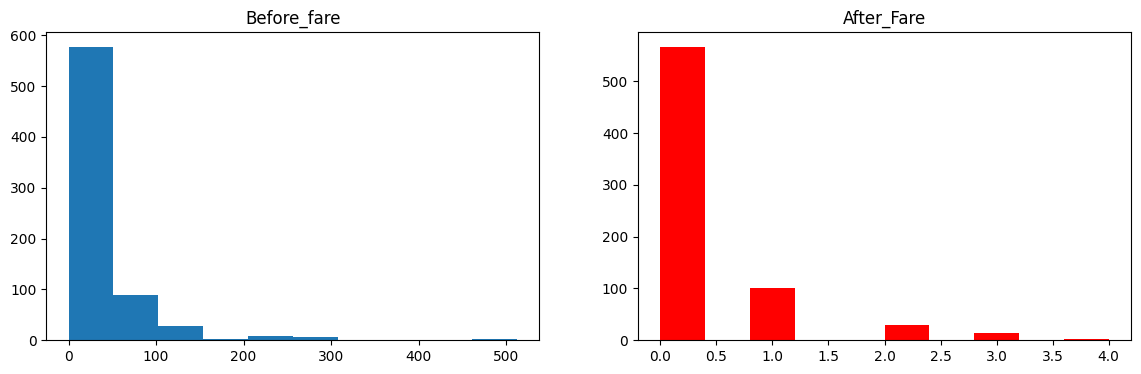

 Age is    kmeans   And    fare is   uniform
0.6373043818466353


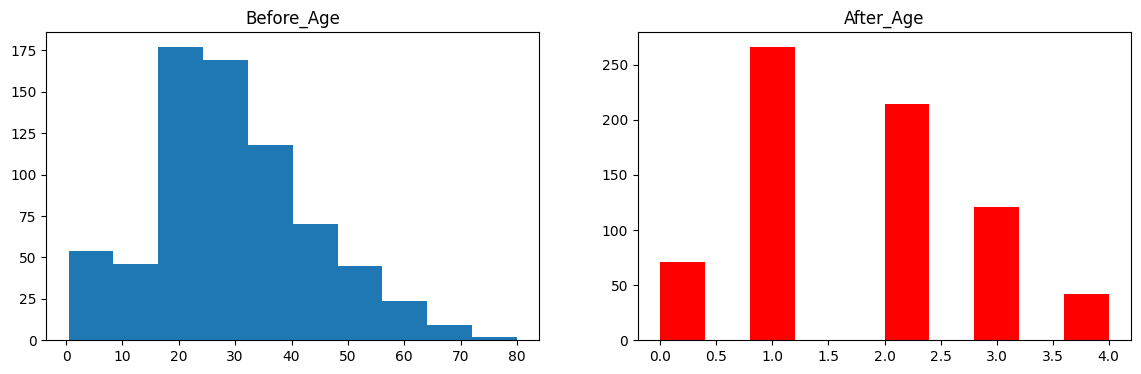

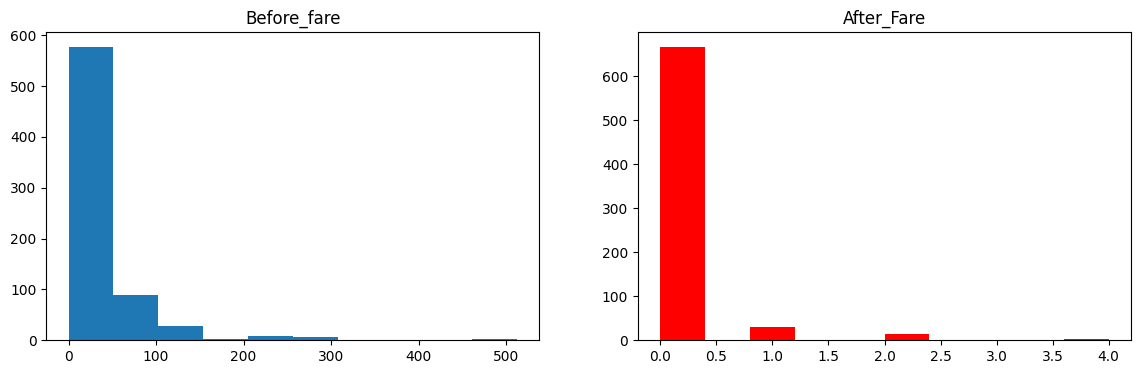

 Age is    kmeans   And    fare is   quantile
0.6359154929577464


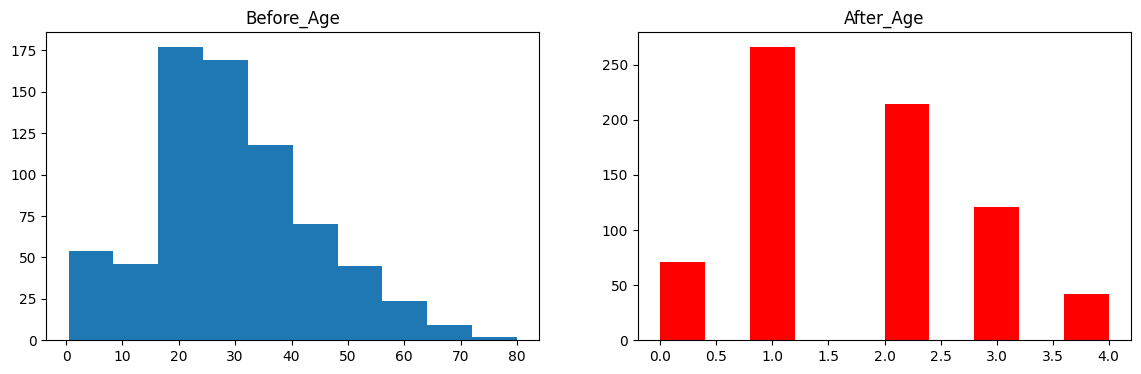

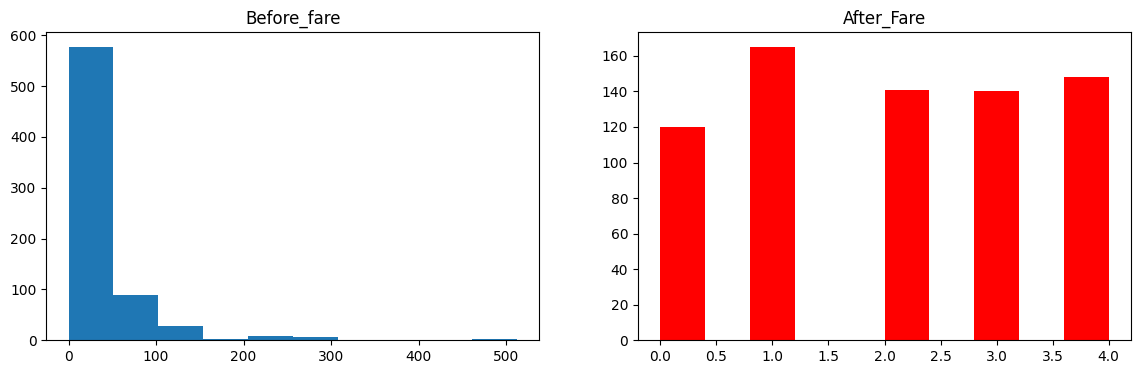

 Age is    kmeans   And    fare is   kmeans
0.6303012519561815


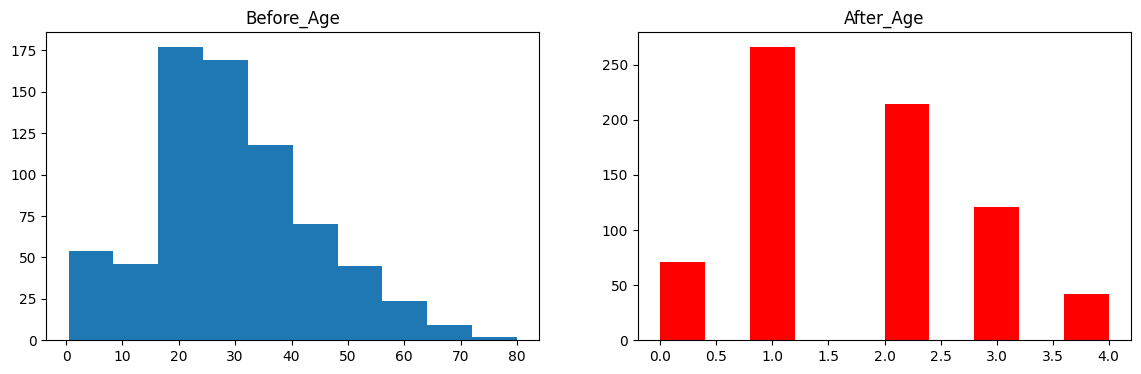

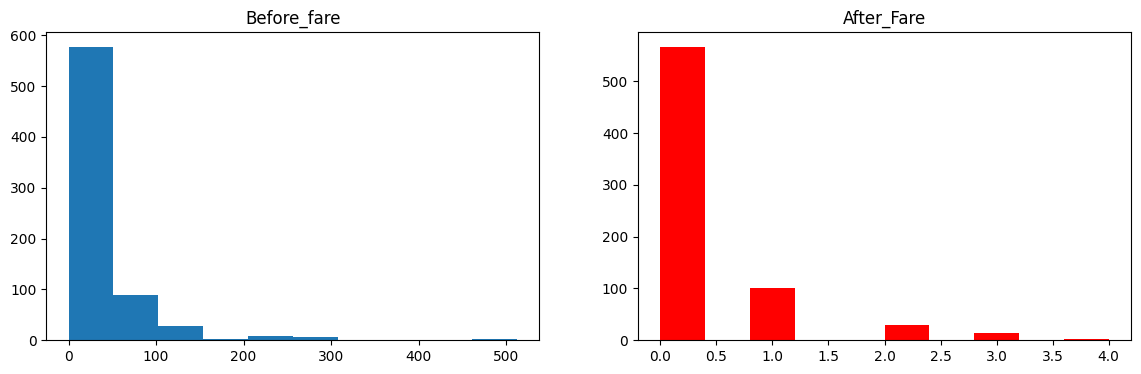

In [57]:
def for_all_pair(bins):
    bin = bins
    age_s = ['uniform','quantile','kmeans']
    fare_s = ['uniform','quantile','kmeans']
    for i in age_s:
        for j in fare_s:
            print(" Age is    " + i + "   And    fare is   "+ j)
            discretize(bin,i,j)



for_all_pair(5)            

 Age is    uniform   And    fare is   uniform
0.6233176838810641


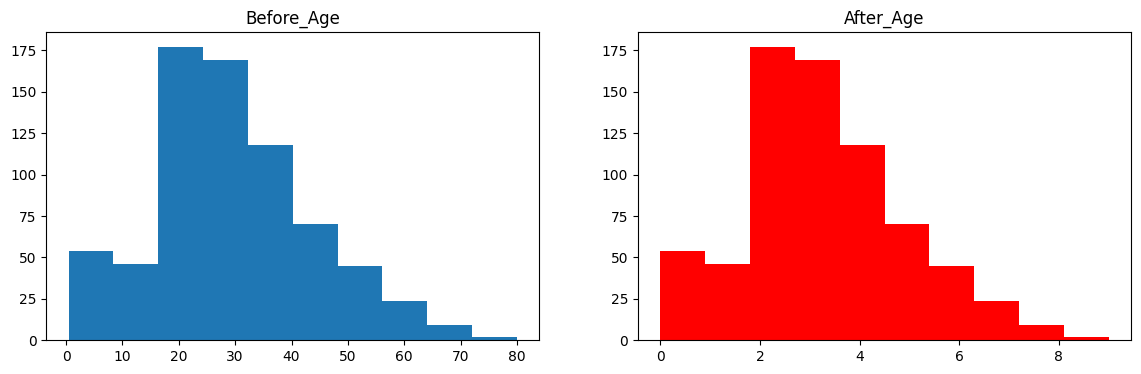

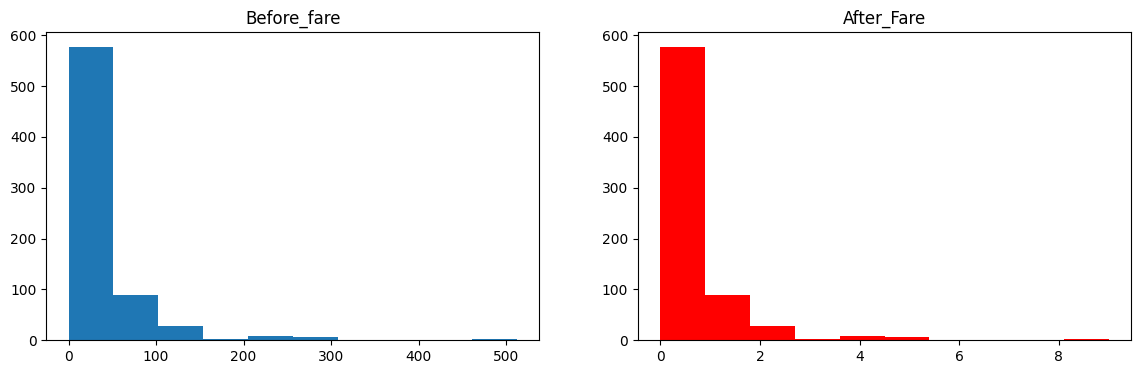

 Age is    uniform   And    fare is   quantile
0.6401017214397495


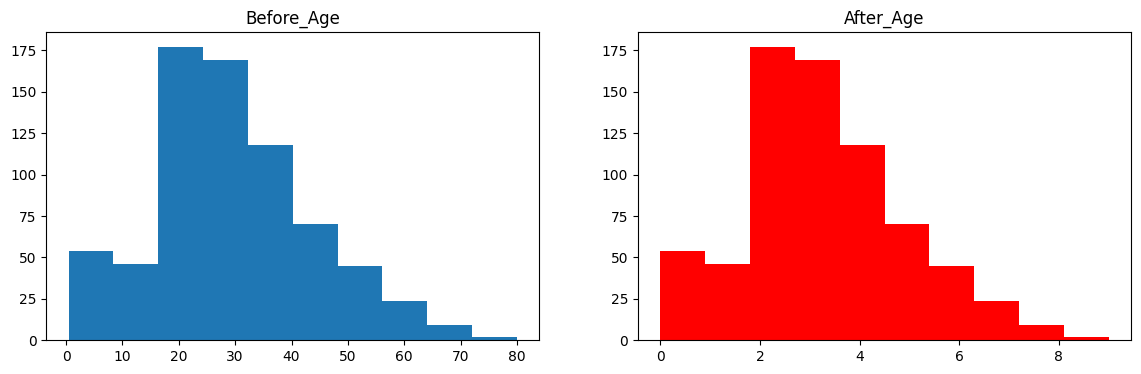

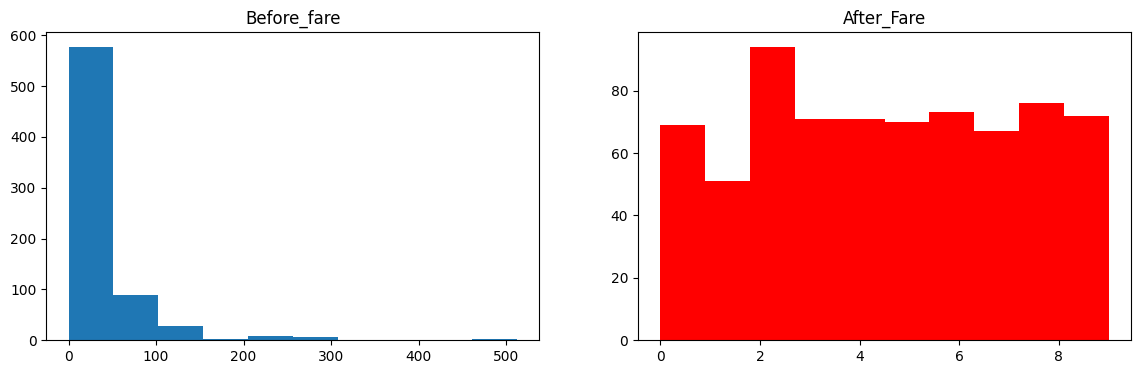

 Age is    uniform   And    fare is   kmeans
0.6303012519561815


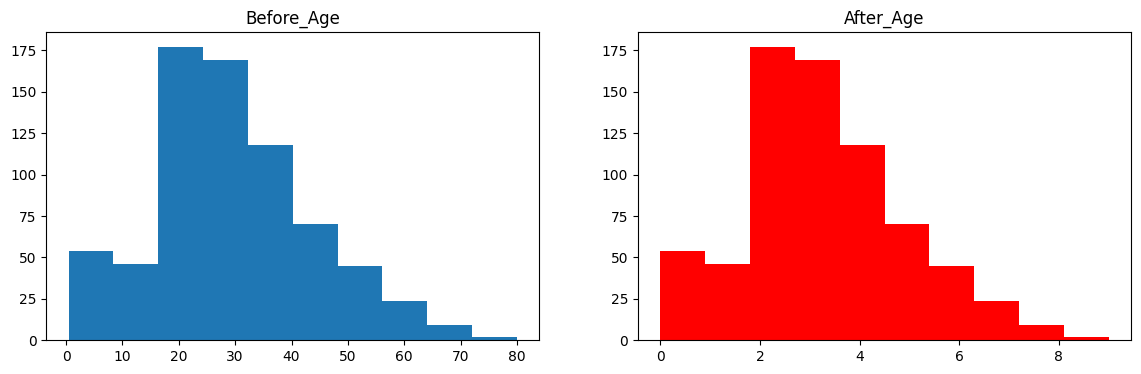

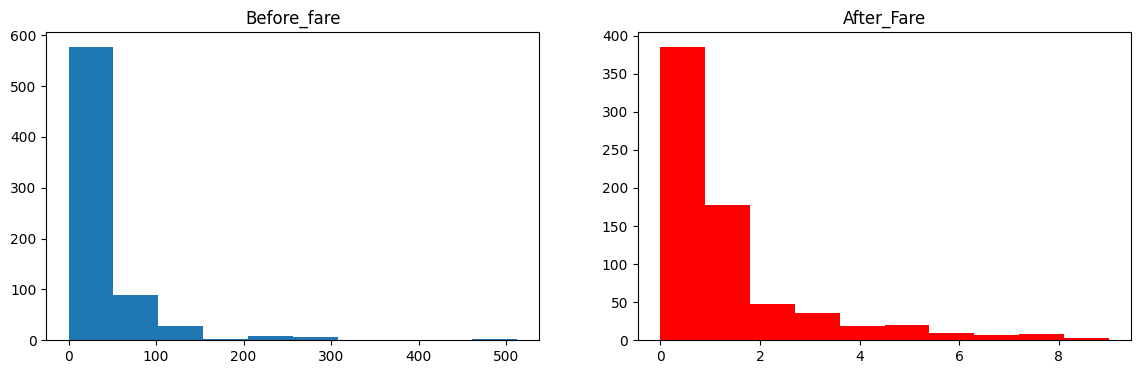

 Age is    quantile   And    fare is   uniform
0.6330790297339594


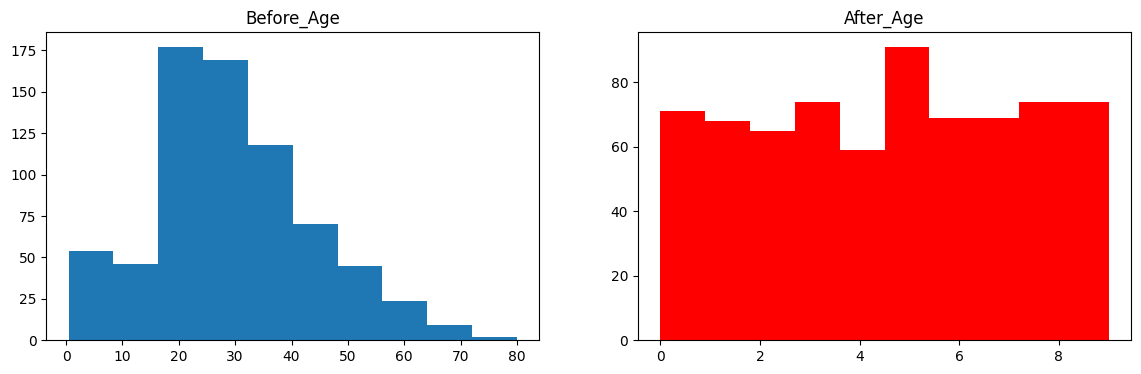

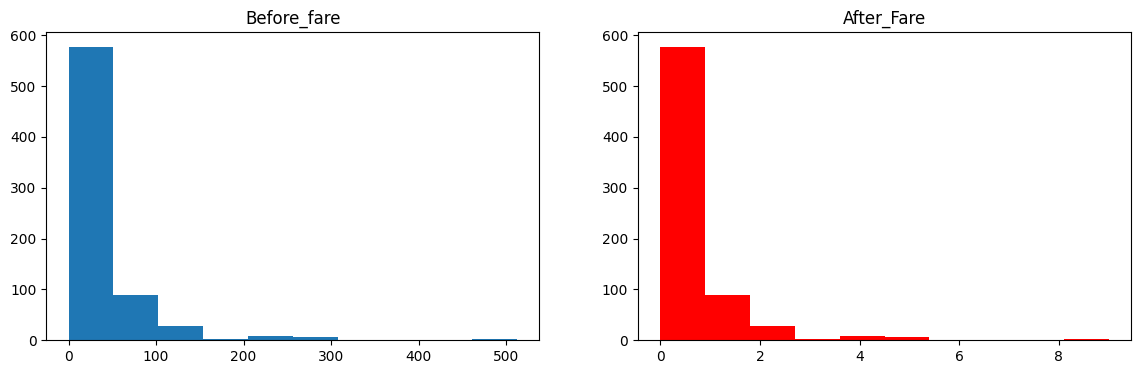

 Age is    quantile   And    fare is   quantile
0.6330790297339594


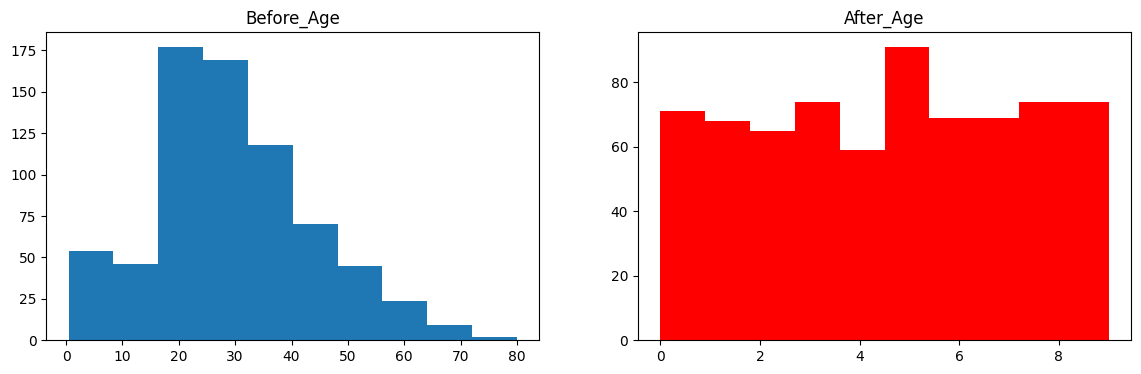

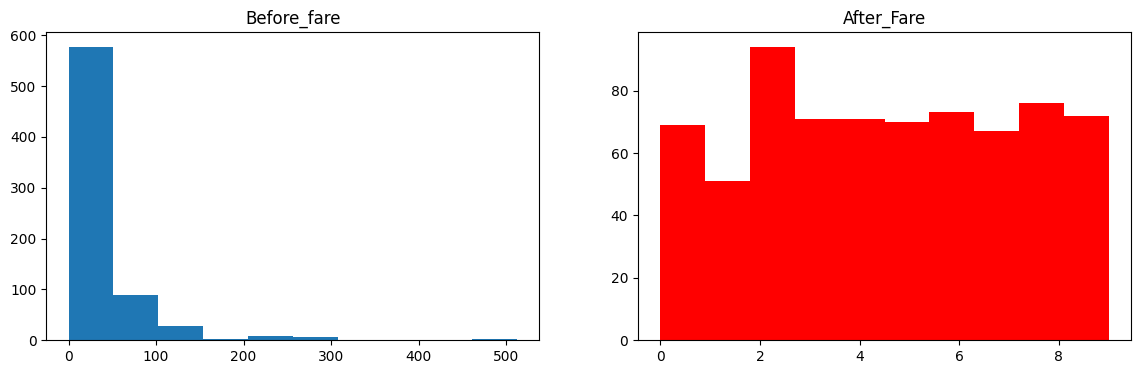

 Age is    quantile   And    fare is   kmeans
0.6303403755868544


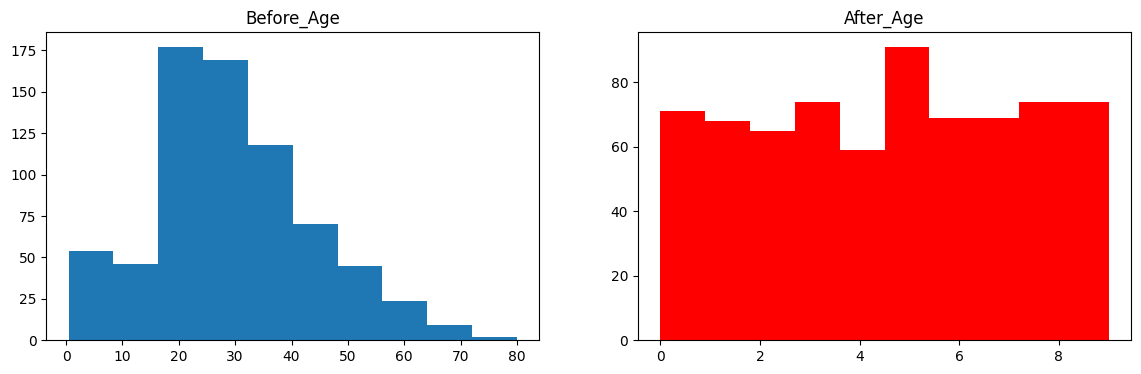

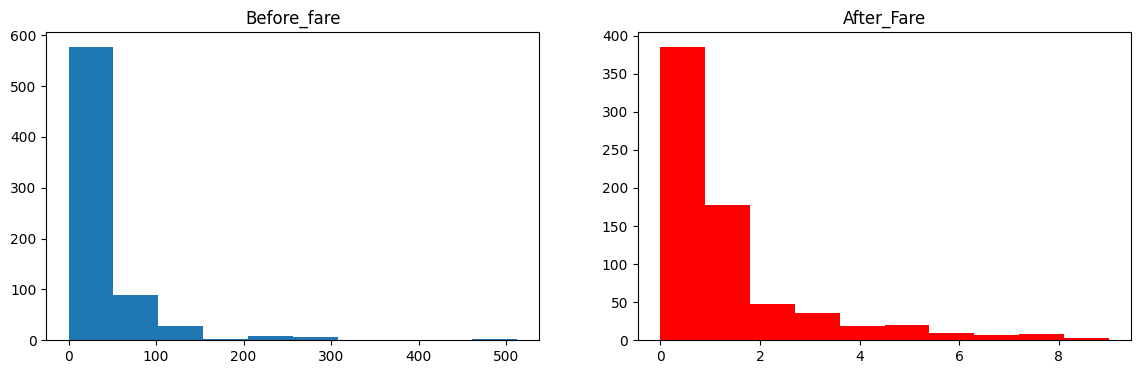

 Age is    kmeans   And    fare is   uniform
0.6261345852895148


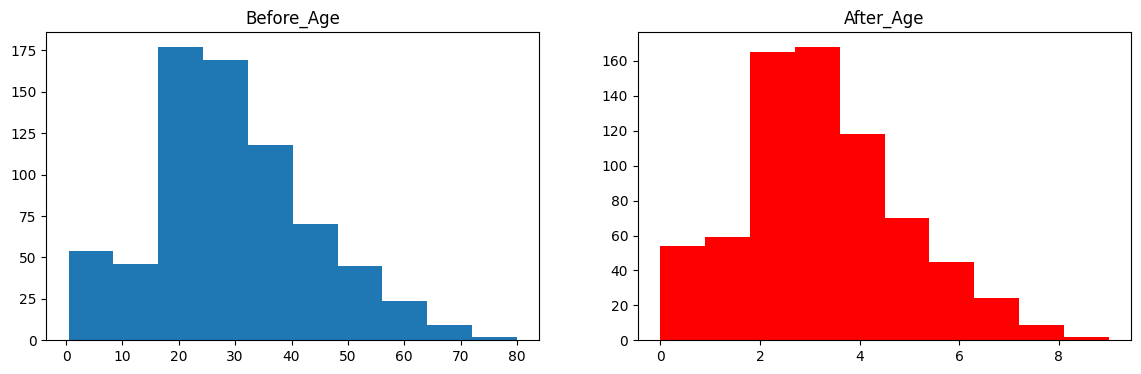

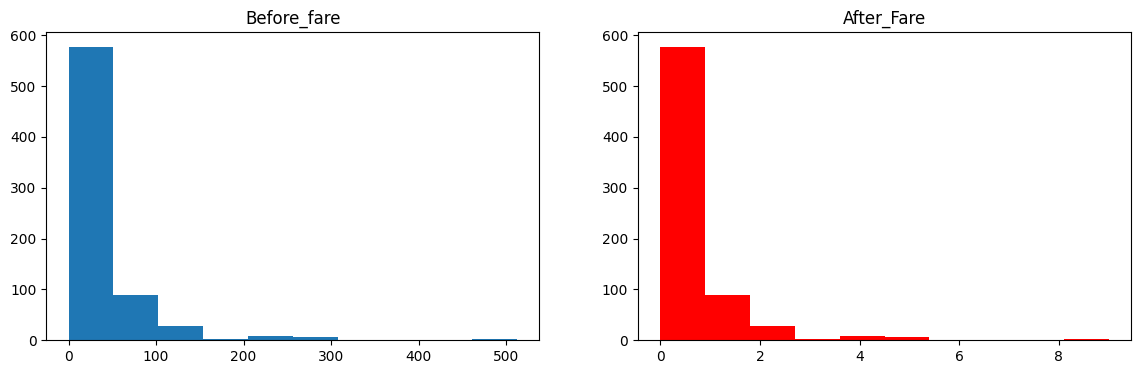

 Age is    kmeans   And    fare is   quantile
0.6316901408450704


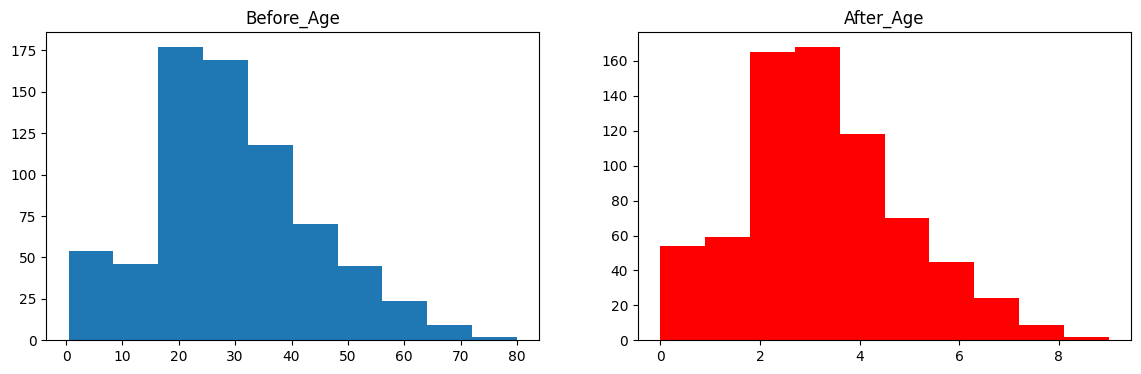

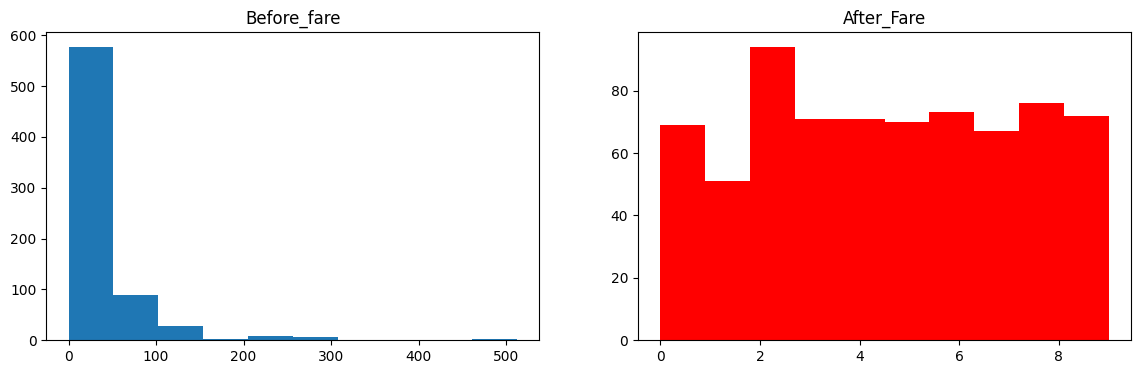

 Age is    kmeans   And    fare is   kmeans
0.6331377151799686


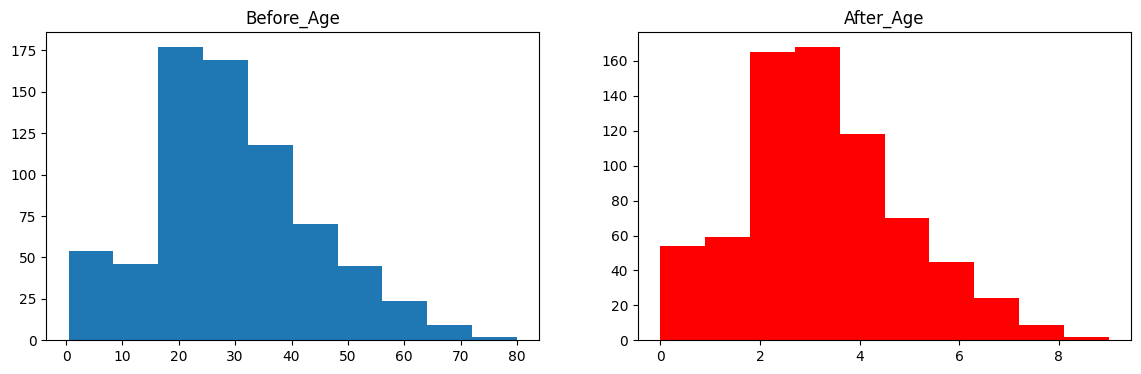

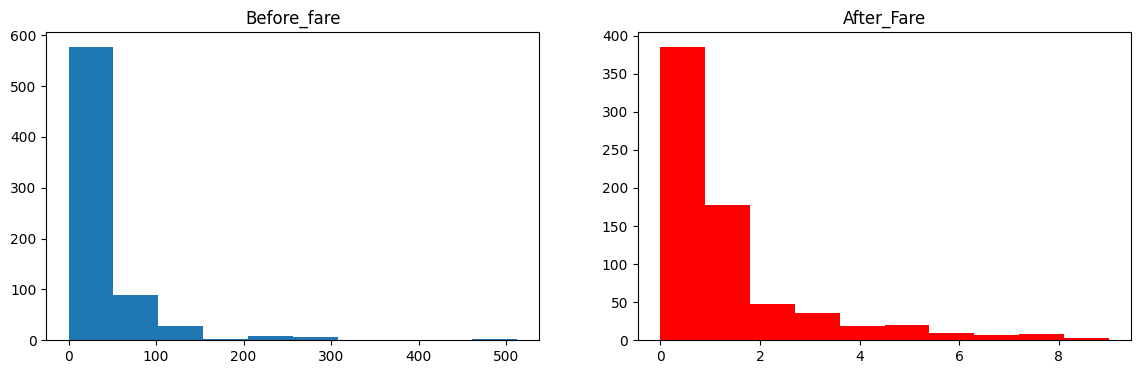

In [58]:
for_all_pair(10)  